# Analysis of Hadamard, Hadamard-Walsh, and Haar Matrices

This notebook explores various matrix transformations and their applications in signal processing.

## a. Implementation of Hadamard Matrices (H2n)

We will start by implementing a function that generates Hadamard matrices of size \(2^n \times 2^n\).
Reminder: The Hadamard matrix of size 2 is:
H 2*2 = [[1, 1]
        [1, -1]]
        
- input: n (int) - the size of the Hadamard matrix
- output: H (np.array) - the Hadamard matrix of size 2^n x 2^n




### Implementation

In [17]:
import numpy as py 

def hadamard_matrix(n):
    """Generate the Hadamard matrix of size 2^n x 2^n."""
    ############## CODE HERE ##############
    if n == 0:
        return py.array([[1]])
    H_n = hadamard_matrix(n-1)
    return py.block([[H_n, H_n], [H_n, -H_n]])
    ############## CODE HERE ##############
    # pass


### Let's test the function with an example

In [18]:

# Test the function
H = hadamard_matrix(3)  
print("Your function output\n")
print(H)
print("\n")
# import Hadamard matrix from scipy
from scipy.linalg import hadamard
# compare the two
H2 = hadamard(8)
print("H2\n")
print(H2)


def test_hadamard_matrix():
    H = hadamard_matrix(3)
    H2 = hadamard(8)
    print("=====================================\n")
    if not py.all(H == H2):
        print('Test failed')
    else:
        print('Test passed')

test_hadamard_matrix()


Your function output

[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


H2

[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]

Test passed


## Task: Transform Orthonormal Families

Given two orthonormal families, $H_{2^n}$ and $\{\sqrt{2^n} \Delta_i(t)\}_{i=1}^{2^n}$, transform these into a new set of functions $\{h_i(t)\}_{i=1}^{2^n}$. The transformation is defined by the following matrix equation:

$$
\begin{pmatrix}
h_1(t) \\
h_2(t) \\
\vdots \\
h_{2^n}(t)
\end{pmatrix}
= H_{2^n}^\top
\begin{pmatrix}
\sqrt{2^n} \Delta_1(t) \\
\sqrt{2^n} \Delta_2(t) \\
\vdots \\
\sqrt{2^n} \Delta_{2^n}(t)
\end{pmatrix}
$$

**Objective:** Plot the functions $\{h_i(t)\}_{i=1}^{2^n}$ for $n = 2, ..., 6$.


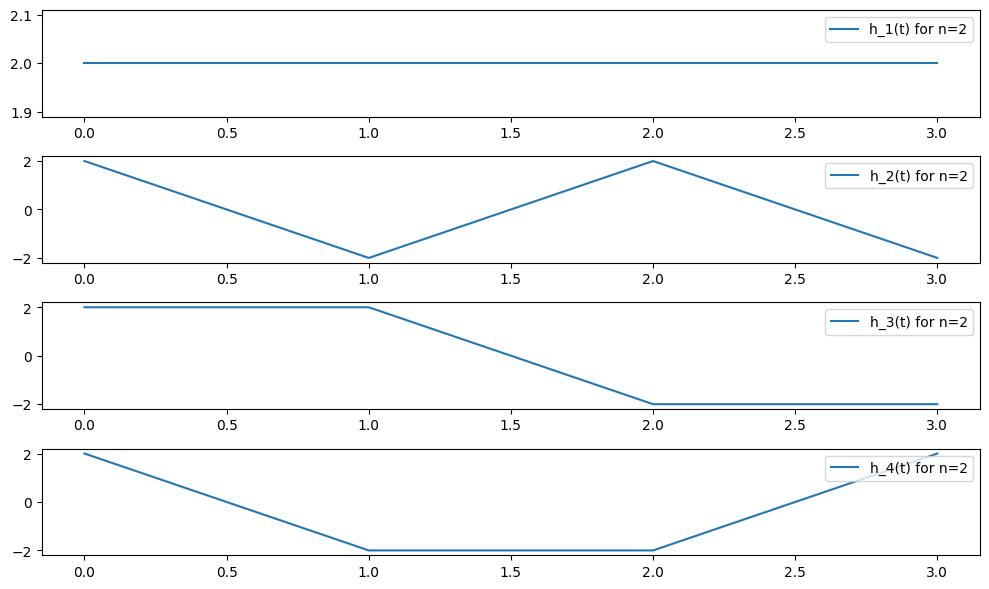

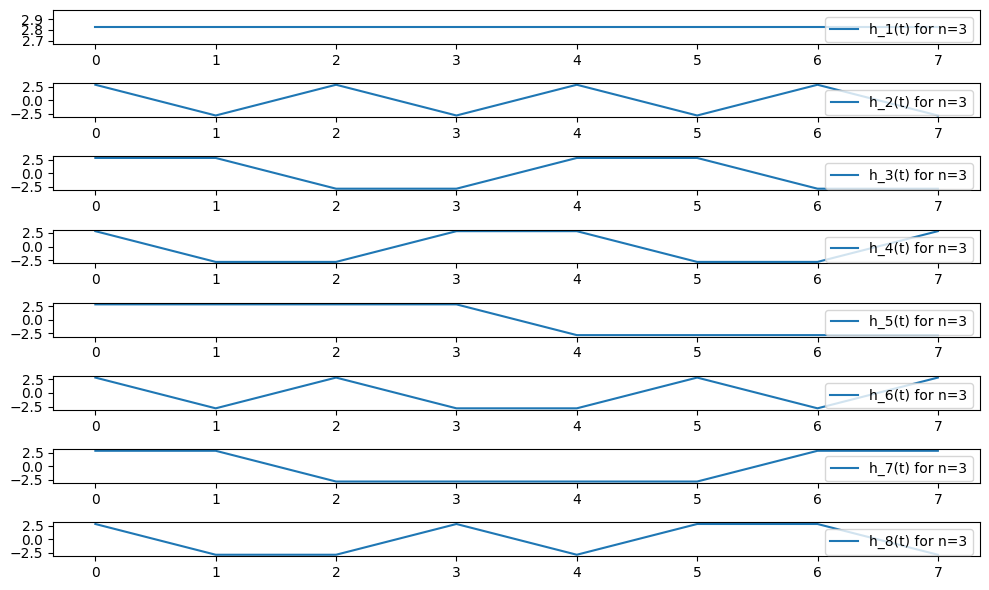

/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_1844/4148646575.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


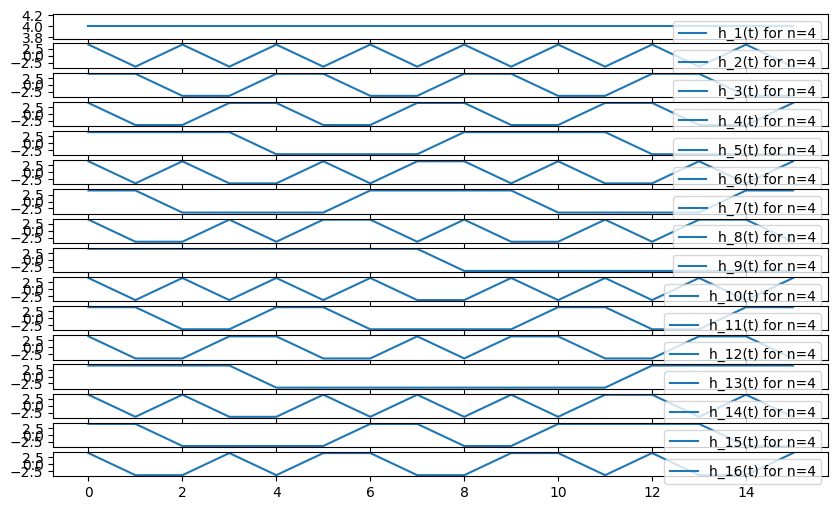

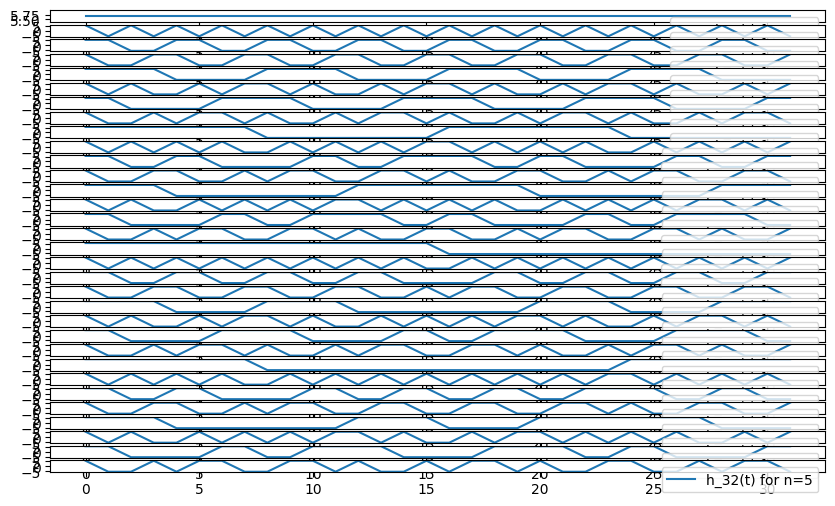

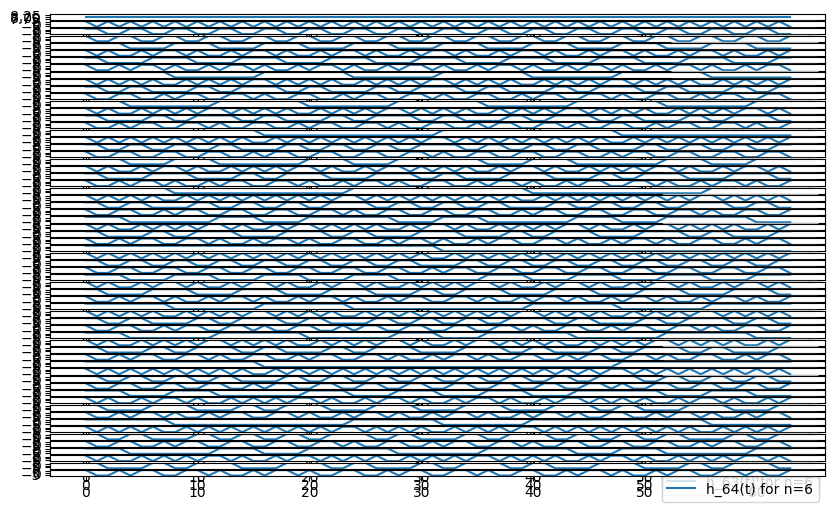

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def transform_orthonormal_families(n):
    """Applies the Hadamard transformation to orthonormal families."""
########## YOUR CODE ##########

    H = hadamard_matrix(n)
    sqrt_factor = np.sqrt(2**n)
    identity_matrix = np.eye(2**n)
    return np.dot(H.T, sqrt_factor * identity_matrix)
########## YOUR CODE ##########

for n in range(2, 7):
    transformed_functions = transform_orthonormal_families(n)
    plt.figure(figsize=(10, 6))
    for i in range(2**n):
        plt.subplot(2**n, 1, i+1)
        plt.plot(transformed_functions[i], label=f'h_{i+1}(t) for n={n}')
        plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


## c. Implementation of Walsh-Hadamard Matrices (Hf_{2^n})

The Walsh-Hadamard matrix is a variant of the Hadamard matrix where the rows are reordered based on their sequency. This section implements a function to convert a standard Hadamard matrix into its corresponding Walsh-Hadamard matrix.


# Walsh-Hadamard Matrices

## Overview

Walsh-Hadamard matrices are derived from Hadamard matrices and are characterized by the property that all entries are either +1 or -1, with rows that are mutually orthogonal. This means the dot product between different rows is zero, making them useful in various signal processing and data compression applications.

## Sequency and Walsh Functions

The key feature distinguishing Walsh-Hadamard matrices from general Hadamard matrices is the *sequency* of the rows. Sequency refers to the number of sign changes in each row of the matrix, which can be thought of as analogous to frequency in sinusoidal functions.

## Application in Data Representation and Processing

Walsh-Hadamard matrices are used extensively in signal processing for tasks such as:

- **Data Compression**: They help in transforming the data into a format where most of the significant information is concentrated in fewer components, similar to Principal Component Analysis (PCA).
- **Error Correction**: Used in coding theory, especially for error detection and correction in digital communication systems.
- **Fast Data Transformation**: Walsh transformations, being binary transformations, are computationally efficient and used for fast data analysis and transformation, comparable to Fast Fourier Transforms but generally faster due to simpler arithmetic operations.

## Example: 4x4 Walsh-Hadamard Matrix

Consider a standard 4x4 Hadamard matrix:

$$
H = \begin{pmatrix}
+1 & +1 & +1 & +1 \\
+1 & -1 & +1 & -1 \\
+1 & +1 & -1 & -1 \\
+1 & -1 & -1 & +1 \\
\end{pmatrix}
$$

To convert this to a Walsh-Hadamard matrix, we reorder the rows based on their sequency (number of sign changes):

1. Row 1 (sequency 0): \( [+1, +1, +1, +1] \)
2. Row 3 (sequency 1): \( [+1, +1, -1, -1] \)
3. Row 2 (sequency 2): \( [+1, -1, +1, -1] \)
4. Row 4 (sequency 2): \( [+1, -1, -1, +1] \)

Reordering by increasing sequency, we get the Walsh-Hadamard matrix:

$$
H_{f} = \begin{pmatrix}
+1 & +1 & +1 & +1 \\
+1 & +1 & -1 & -1 \\
+1 & -1 & +1 & -1 \\
+1 & -1 & -1 & +1 \\
\end{pmatrix}
$$

Note that the rows are now ordered to reflect the increasing complexity of the patterns, which aligns with their sequency. This reordering makes it easier to handle transformations where the sequency plays a role similar to frequency in Fourier transforms.



In [20]:
def walsh_hadamard_matrix(H):
    """
    Convert a Hadamard matrix to a Walsh-Hadamard matrix by reordering its rows based on sequency.
     - Input: H, a Hadamard matrix
     - Output: Hf, a Walsh-Hadamard matrix
    """
    ############## CODE HERE ##############
    # Calculate sequency of each row
    sequency = np.sum(H, axis=1)
    # Reorder the rows based on sequency
    return H[np.argsort(sequency)]
    ############## CODE HERE ##############

# Example of generating a Walsh-Hadamard matrix from a Hadamard matrix
n = 3  # You can choose other values for n to generate larger matrices
H = hadamard_matrix(n)
Hf = walsh_hadamard_matrix(H)
print(Hf)



[[ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1]]


## Task d: Transformation Using Walsh-Hadamard Matrices


Given the Walsh-Hadamard matrix $Hf_{2^n}$ and the orthonormal family $\{\sqrt{2^n} \Delta_i(t)\}_{i=1}^{2^n}$, transform these into a new set of functions $\{hw_i(t)\}_{i=1}^{2^n}$. This transformation is defined by the matrix multiplication:

$$
\begin{pmatrix}
hw_1(t) \\
hw_2(t) \\
\vdots \\
hw_{2^n}(t)
\end{pmatrix}
= Hf_{2^n}^\top
\begin{pmatrix}
\sqrt{2^n} \Delta_1(t) \\
\sqrt{2^n} \Delta_2(t) \\
\vdots \\
\sqrt{2^n} \Delta_{2^n}(t)
\end{pmatrix}
$$

### Objective

Plot the functions $\{hw_i(t)\}_{i=1}^{2^n}$ for $n = 2, ..., 6$.


This task utilizes the Walsh-Hadamard matrix, a variant of the Hadamard matrix where rows are reordered based on sequency. This matrix operation transforms a set of delta functions $\Delta_i(t)$—each representing an impulse at different time points—into a set of Walsh functions, which are invaluable in signal processing for their properties of representing signals in binary-like waveforms.


By plotting these functions, we will visually demonstrate how the Walsh-Hadamard transformation affects signals, converting simple impulses into complex waveforms that are crucial in digital communication and data compression.


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def hadamard_order(n):
    """ 
    Recursively generate a Hadamard matrix of order 2^n. 
    - Input: n, the order of the matrix
    - Output: H, the Hadamard matrix
    """
    if n == 0:
        return np.array([[1]])
    else:
        ################# CODE HERE #################
        H = hadamard_order(n - 1)
        return np.block([[H, H], [H, -H]])
        ################# CODE HERE #################

def walsh_hadamard_matrix(n):
    """ 
    Generate a Walsh-Hadamard matrix of size 2^n x 2^n by reordering Hadamard matrix rows based on sequency. 
    - Input: n, the order of the matrix
    - Output: H, the Walsh-Hadamard matrix
    """
    ############## CODE HERE ##############
    H = hadamard_order(n)
    sequency = [bin(int(''.join(row.astype(int).astype(str)), 2)).count('1') for row in (H+1)//2]
    return H[np.argsort(sequency)]
    ############## CODE HERE ##############

def transform_orthonormal_families(n):
    """ 
    Transform the orthonormal families using the transpose of the Walsh-Hadamard matrix. 
    - Input: n, the order of the matrix
    - Output: transformed, the transformed orthonormal families
    """
    ############## CODE HERE ##############
    Hf = walsh_hadamard_matrix(n)
    sqrt_factor = np.sqrt(2**n)
    identity_matrix = np.eye(2**n)
    transformed = np.dot(Hf.T, sqrt_factor * identity_matrix)
    ############## CODE HERE ##############
    return transformed



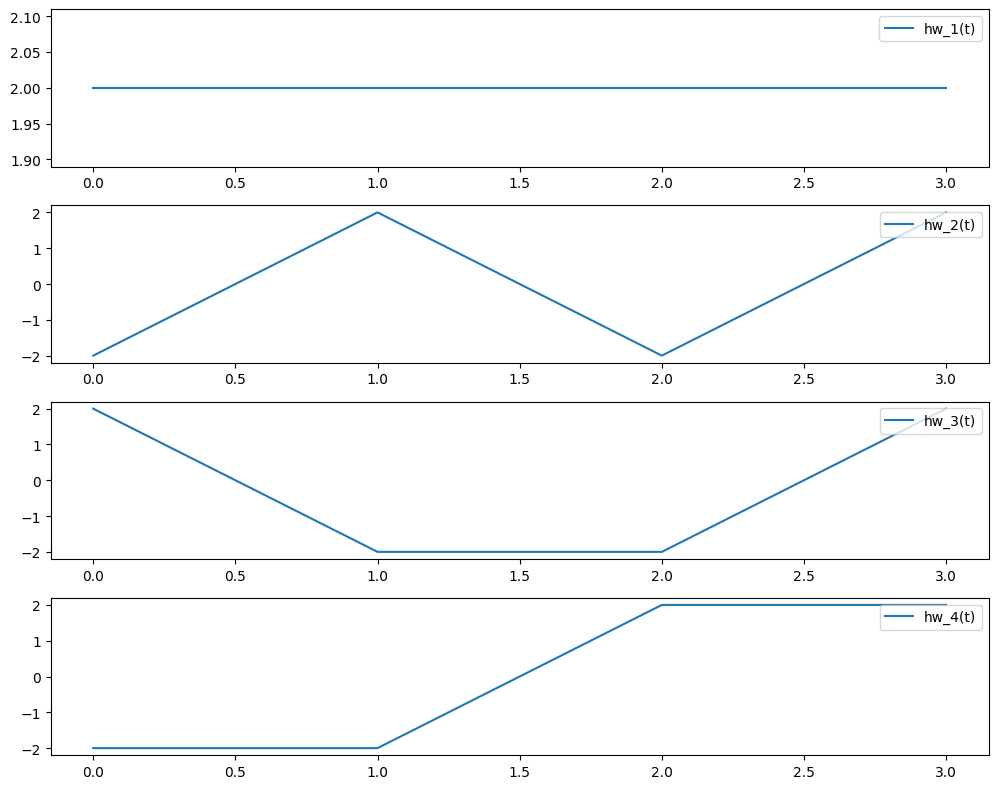

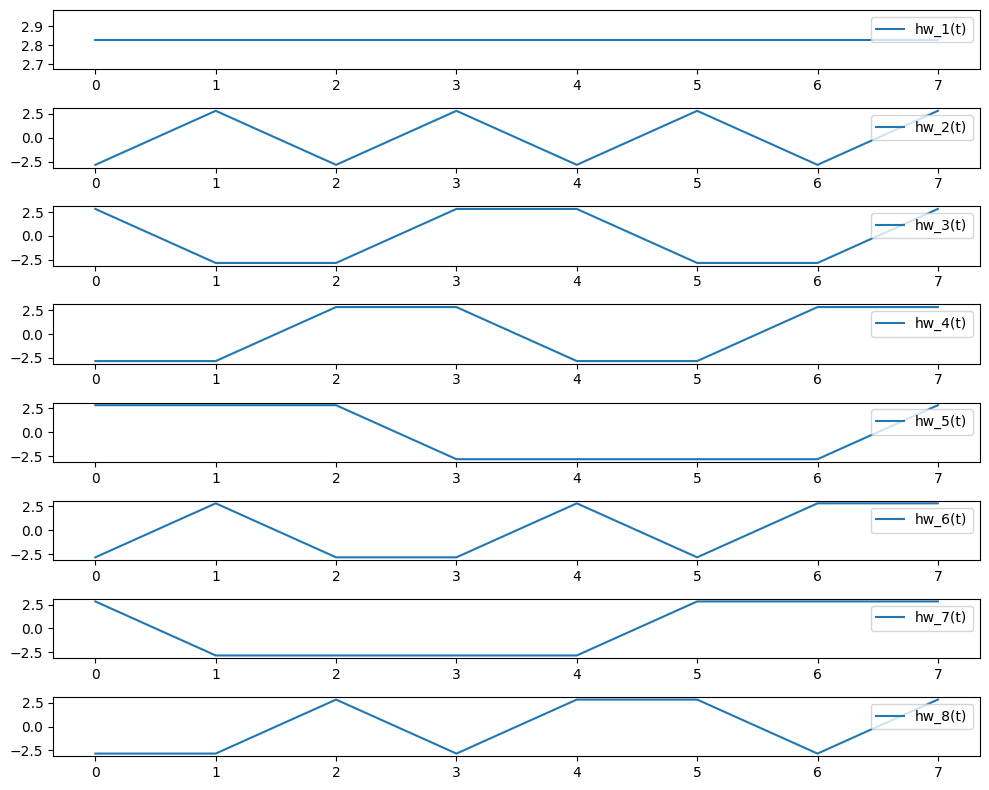

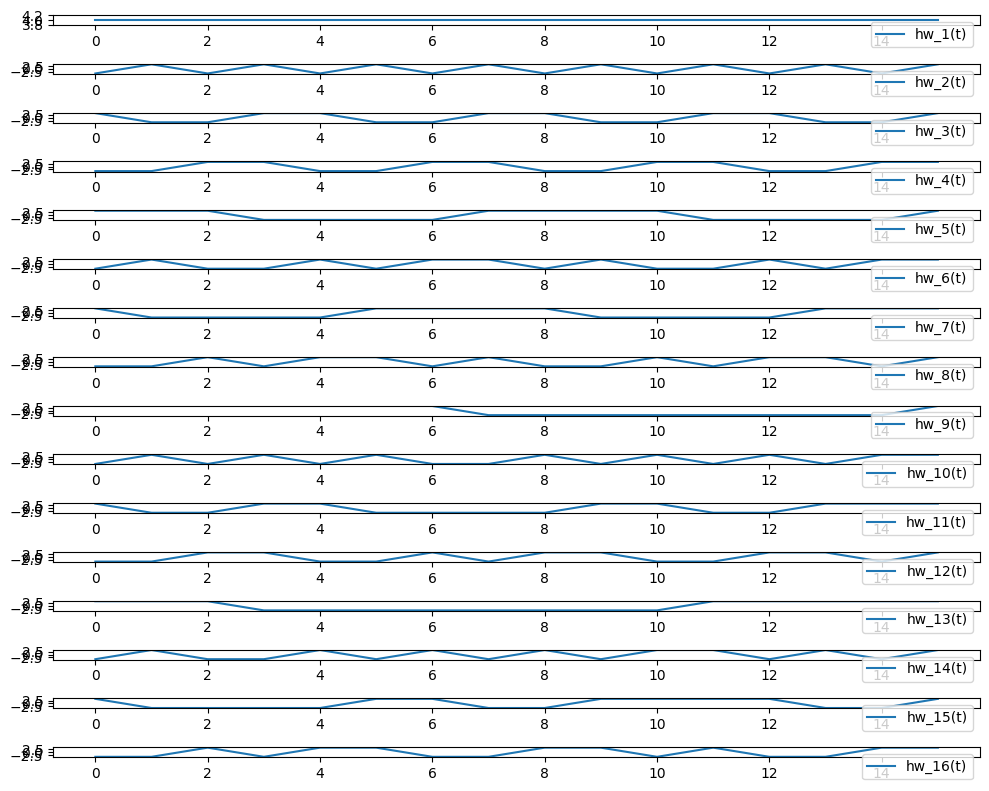

/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_1844/2168083743.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


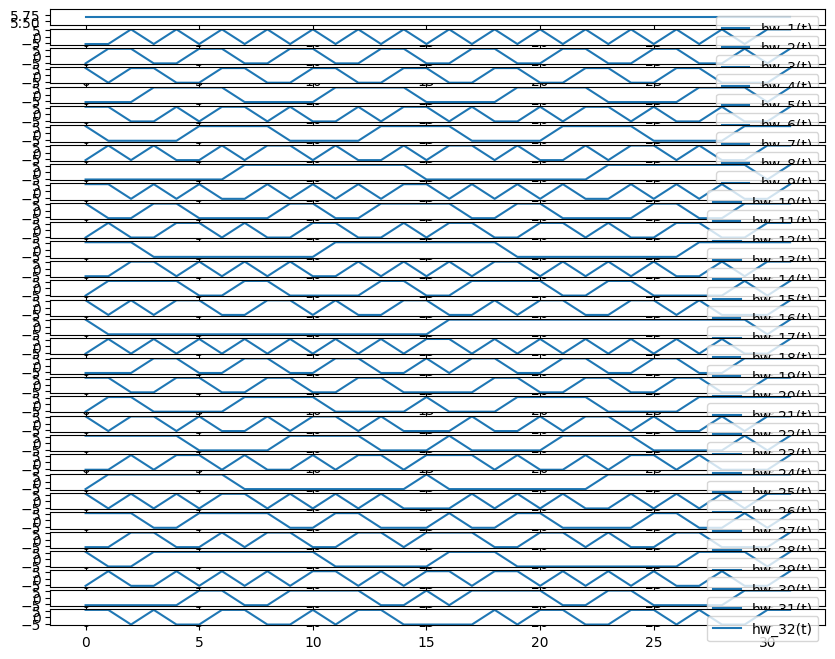

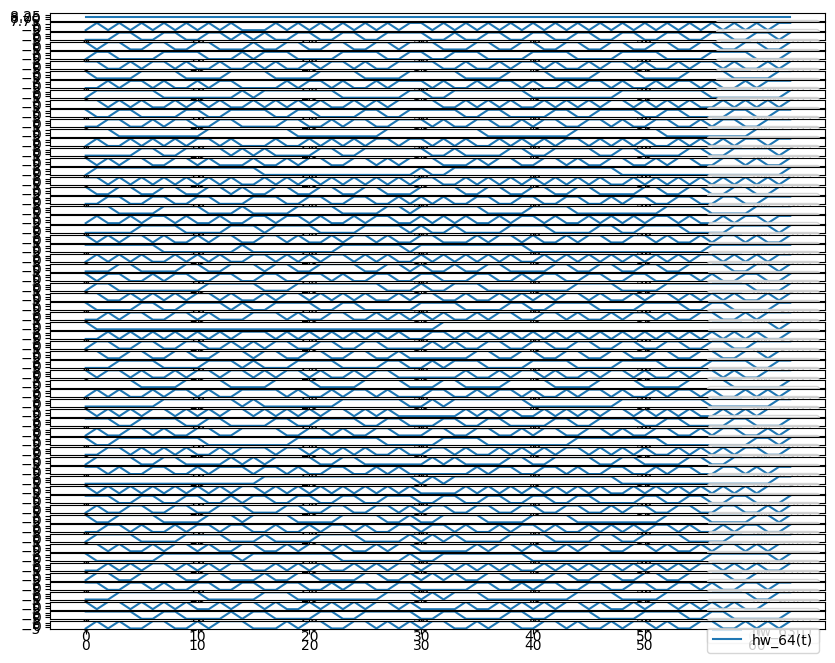

In [22]:
def plot_transformed_functions(n):
    """ 
    Plot the transformed functions for given n. 
    - Input: n, the order of the matrix
    - Output: plot of the transformed functions
    """
    functions = transform_orthonormal_families(n)
    plt.figure(figsize=(10, 8))
    for i in range(2**n):
        plt.subplot(2**n, 1, i+1)
        plt.plot(functions[i], label=f'hw_{i+1}(t)')
        plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

for n in range(2, 7):
    plot_transformed_functions(n)


# Task e: Implementation of Haar Matrices $H^\wedge_{2^n}$

Implement a function that generates Haar matrices of size $2^n \times 2^n$. These matrices play a crucial role in signal processing, particularly in the analysis and synthesis of signals in terms of wavelet bases.

The Haar matrix, used extensively in wavelet analysis, is a structured matrix where each row represents a Haar wavelet. These matrices are fundamentally important for tasks such as image compression and noise reduction in signals.

### Input
- **Level $n$**: The level $n$ determines the size of the matrix, $2^n \times 2^n$, dictating the resolution and complexity of the wavelets.

### Output
- **Haar Matrix $H^\wedge_{2^n}$**: A matrix where each row corresponds to a wavelet, used to transform data into the Haar wavelet domain.


Haar matrix tests passed for n=1
Haar matrix tests passed for n=2
Haar matrix tests passed for n=3


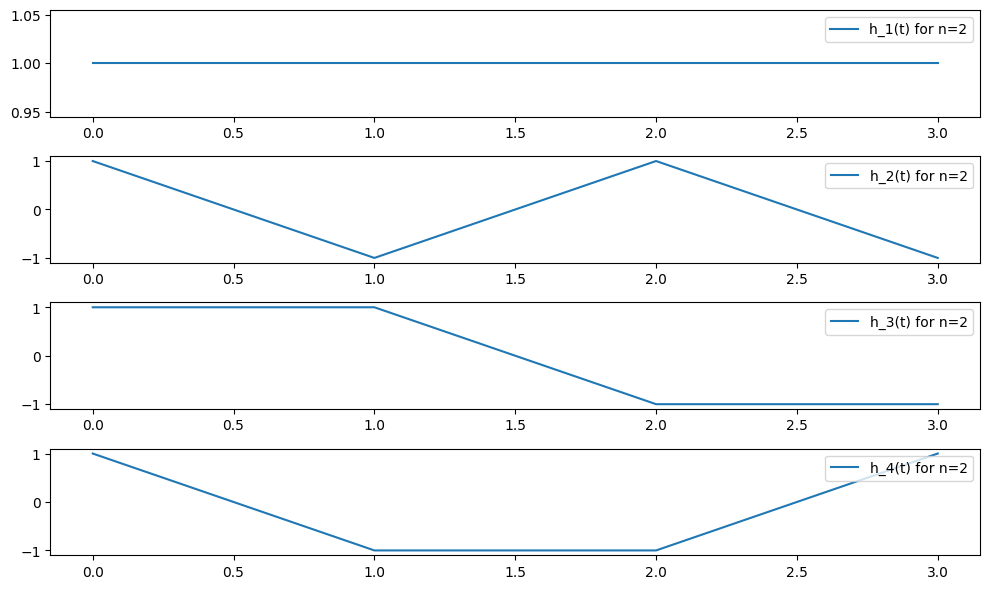

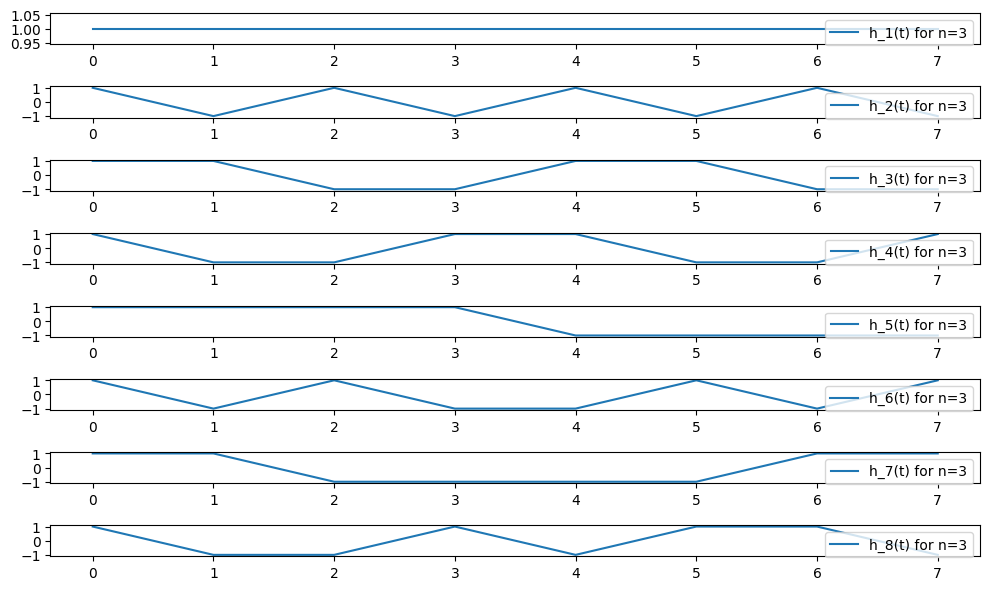

/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_1844/2212798806.py:56: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


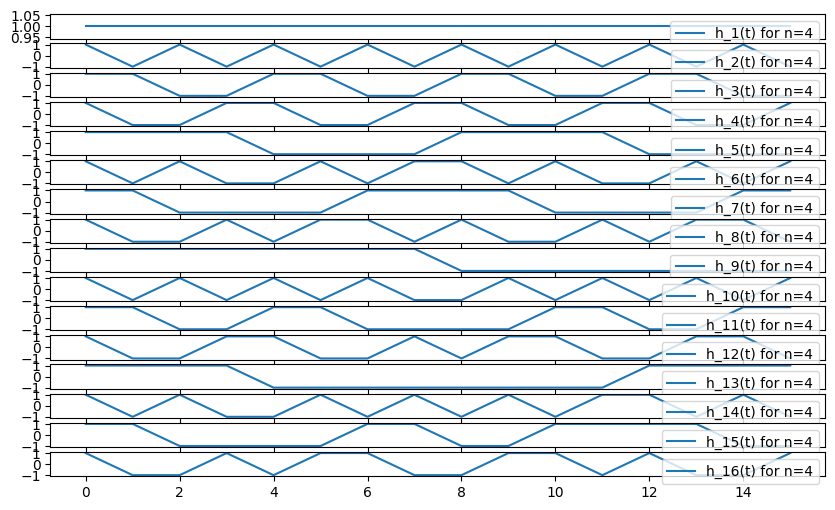

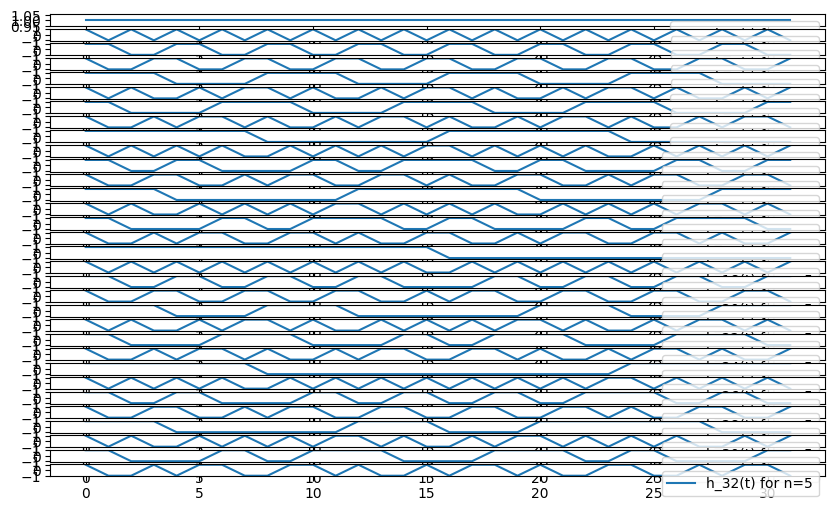

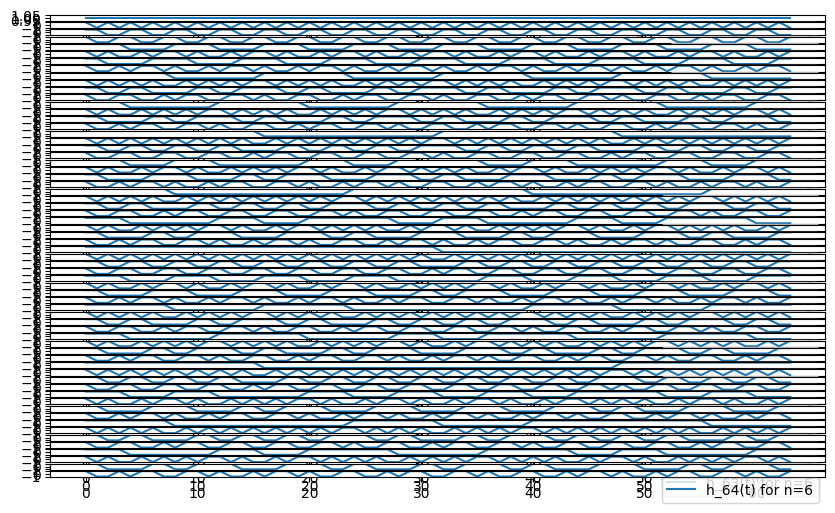

In [23]:
def haar_matrix(n):
    """Generate the Haar matrix of size 2^n x 2^n."""
    ############## CODE HERE ##############
    if n == 0:
        return np.array([[1]])
    H_n = haar_matrix(n-1)
    H = np.block([[H_n, H_n], [H_n, -H_n]])
    return H / np.sqrt(2)
    ############## CODE HERE ##############


def test_haar_matrix(n):
    """
    Test the orthogonality and normalization of the Haar matrix.
    - Input: n, the order of the matrix
    - Output: None
    """
    H = haar_matrix(n)
    # Check orthogonality by multiplying the matrix by its transpose and checking against the identity matrix
    is_orthogonal = np.allclose(np.dot(H, H.T), np.eye(2 ** n), atol=1e-10)
    # Check normalization by ensuring the norm of each row is 1
    is_normalized = np.allclose(np.linalg.norm(H, axis=1), 1)
    
    assert is_orthogonal, "Orthogonality test failed: H * H.T is not the identity matrix"
    assert is_normalized, "Normalization test failed: Rows are not unit vectors"
    
    print(f"Haar matrix tests passed for n={n}")

# Run tests for different levels to validate the Haar matrix properties
for n in range(1, 4):  # Testing for n = 1, 2, 3
    test_haar_matrix(n)


# plot the transformed functions for Haar matrix
def transform_orthonormal_families(n):
    """
    Applies the Haar transformation to orthonormal families.
     - Input: n, the order of the matrix
     - Output: transformed, the transformed orthonormal families
    """
    ############## CODE HERE ##############
    H = haar_matrix(n)
    sqrt_factor = np.sqrt(2 ** n)
    identity_matrix = np.eye(2 ** n)
    return np.dot(H.T, sqrt_factor * identity_matrix)
    ############## CODE HERE ##############


for n in range(2, 7):
    transformed_functions = transform_orthonormal_families(n)
    plt.figure(figsize=(10, 6))
    for i in range(2 ** n):
        plt.subplot(2 ** n, 1, i + 1)
        plt.plot(transformed_functions[i], label=f'h_{i + 1}(t) for n={n}')
        plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()



# Task f: Transformation Using Haar Matrices and Plotting the Results

Transform two orthonormal families using the transpose of the Haar matrix $H^\wedge_{2^n}$ and then plot the resulting functions. The transformation is defined by the following matrix equation:

$$
\begin{pmatrix}
ha_1(t) \\
ha_2(t) \\
\vdots \\
ha_{2^n}(t)
\end{pmatrix}
= (H^\wedge_{2^n})^\top
\begin{pmatrix}
\sqrt{2^n} \Delta_1(t) \\
\sqrt{2^n} \Delta_2(t) \\
\vdots \\
\sqrt{2^n} \Delta_{2^n}(t)
\end{pmatrix}
$$

### Input
- **Haar Matrix $H^\wedge_{2^n}$**: Used to transform signals into a format that captures both their frequency and spatial characteristics.
- **Orthonormal Family $\{\sqrt{2^n} \Delta_i(t)\}_{i=1}^{2^n}$**: Represents discrete signals at each point, scaled by $\sqrt{2^n}$.

### Output
- **Transformed Functions $\{ha_i(t)\}_{i=1}^{2^n}$**: These functions are the result of applying the Haar matrix to the orthonormal family, showcasing how each basis function modifies the input.


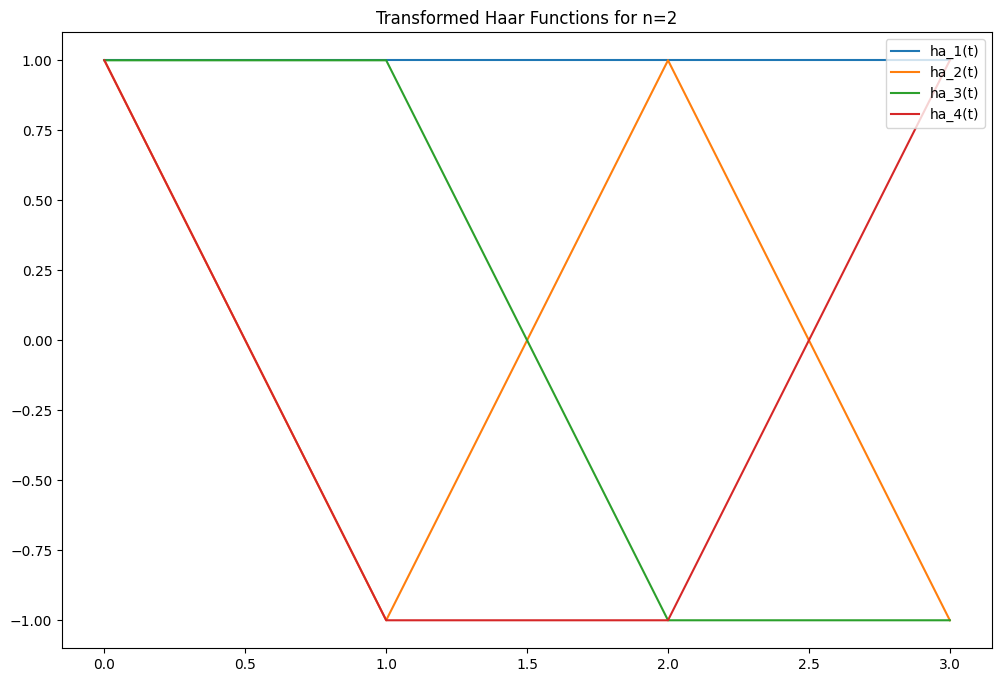

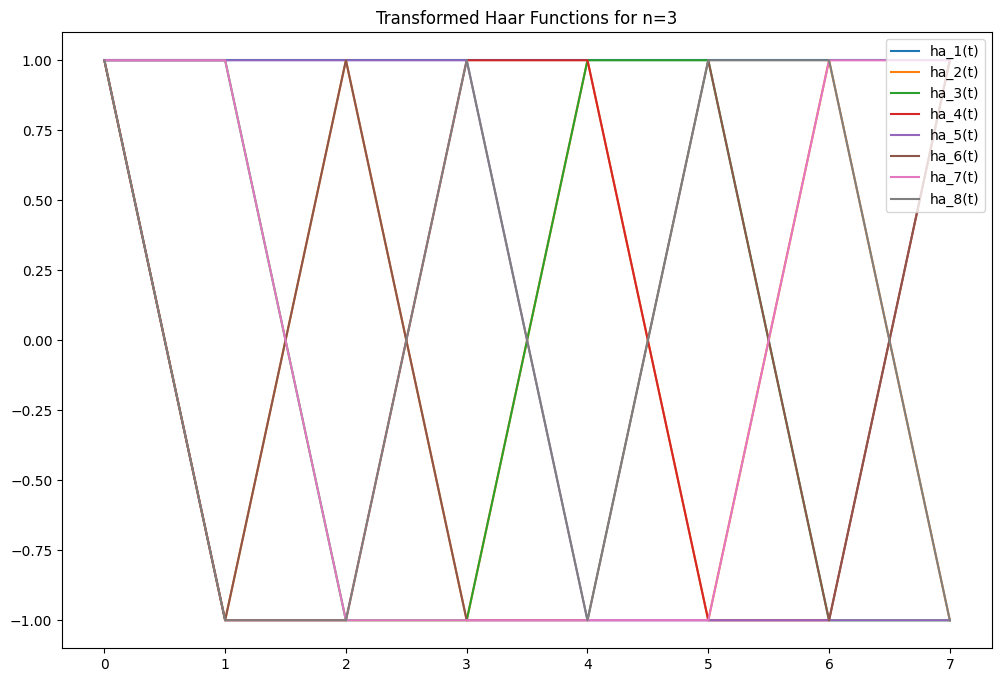

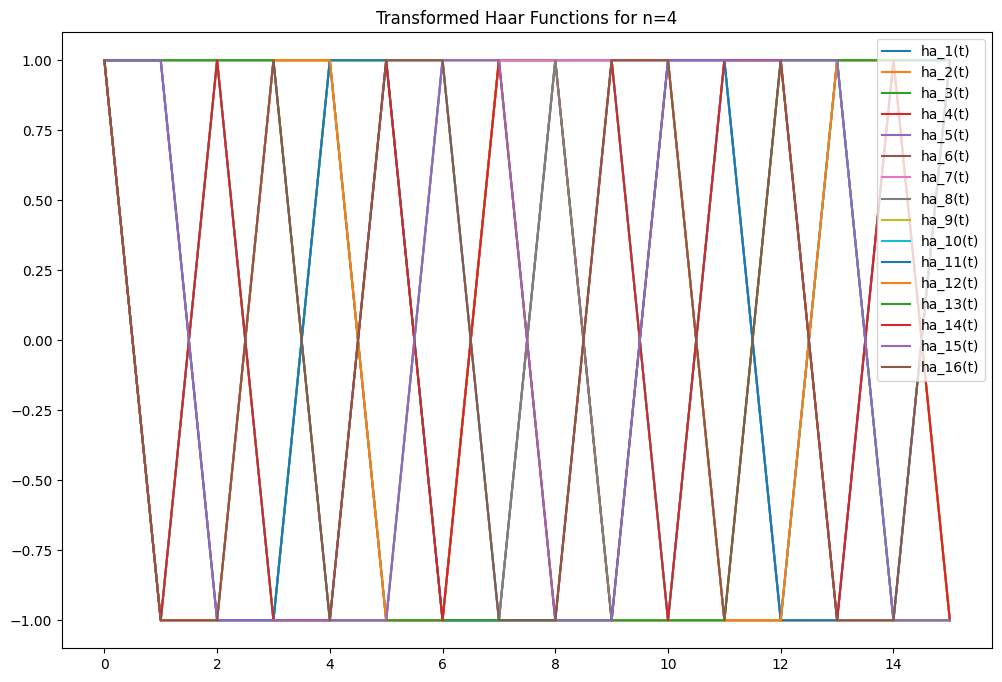

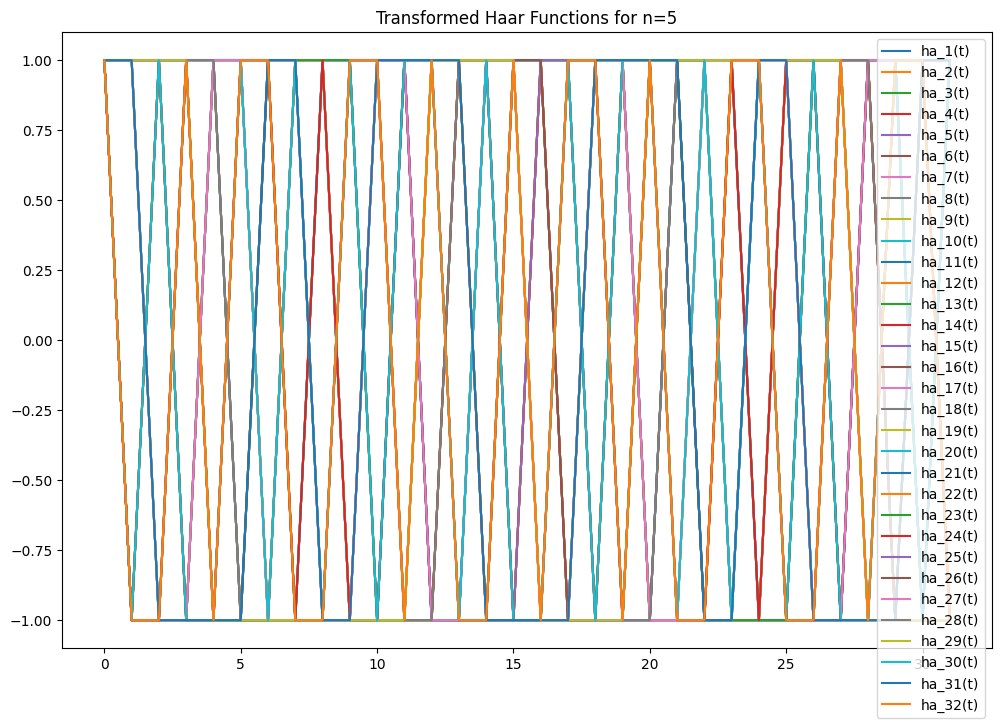

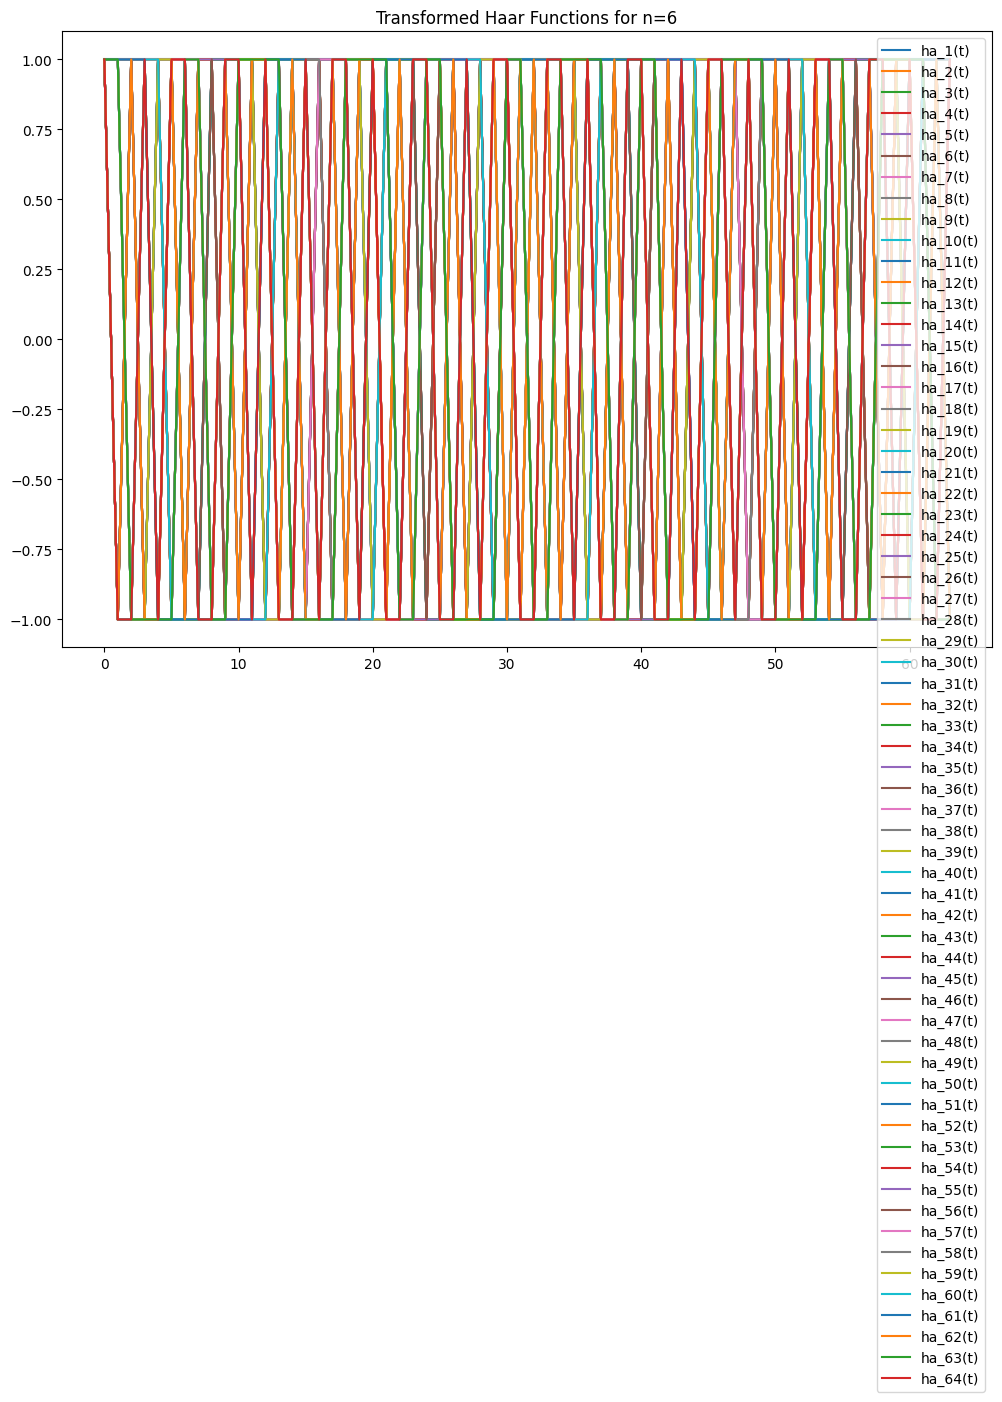

In [24]:


def transform_and_plot_haar(n):
    """Transform the orthonormal families using the Haar matrix and plot the results.
    - Input: n, the order of the matrix
    - Output: plot of the transformed functions
    """
    H = haar_matrix(n)
    H_transpose = H.T
    ########## YOUR CODE ##########
    sqrt_factor = np.sqrt(2**n)
    identity_matrix = np.eye(2**n)
    transformed = np.dot(H_transpose, sqrt_factor * identity_matrix)
    ########## YOUR CODE ##########
    
    plt.figure(figsize=(12, 8))
    for i in range(2**n):
        plt.plot(transformed[i], label=f'ha_{i+1}(t)')
        plt.legend(loc='upper right')
    plt.title(f'Transformed Haar Functions for n={n}')
    plt.show()


# Example usage: plot for n = 2 to n = 6
for n in range(2, 7):
    transform_and_plot_haar(n)


# Task g: Best k-Term Approximation of a Function

Given the function $\phi(t) = t e^t$ over the interval $t \in [-4, 5]$, find the best k-term approximation using various bases for $n=2$, which means we are considering up to $2^n = 4$ terms. Analyze the results graphically and calculate the Mean Squared Error (MSE) for each approximation.

The objective is to project the function $\phi(t)$ onto a subspace spanned by the first $k$ basis functions from each tested basis set. We then measure the quality of each approximation using the MSE between the actual function and its approximation.

### Input
- **Function $\phi(t)$**: Defined as $\phi(t) = t e^t$.
- **Interval**: $t \in [-4, 5]$.

### Output
- **Best k-Term Approximations**: The approximations of $\phi(t)$ using different basis sets.
- **MSE Errors**: The error measurement for each approximation.


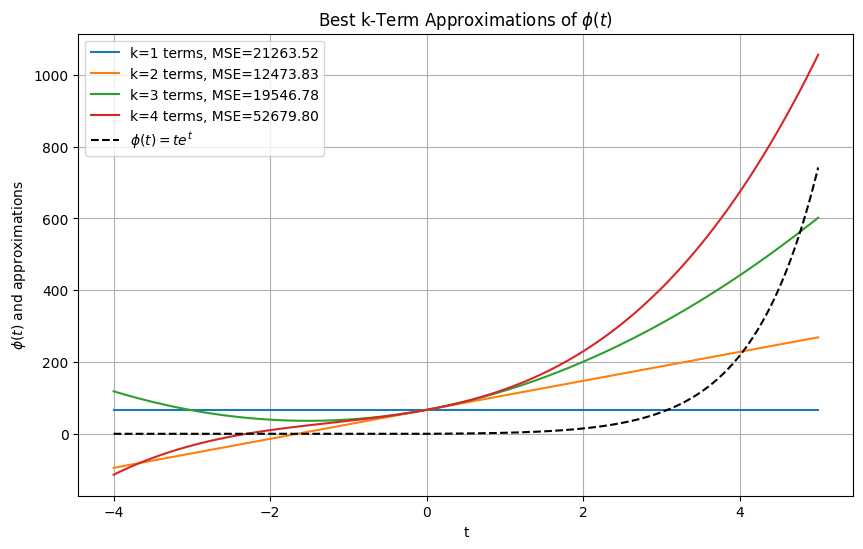

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def phi(t):
    return t * np.exp(t)

# Generate points on the interval
t = np.linspace(-4, 5, 400)
phi_values = phi(t)

# Define the basis functions
# For simplicity, using polynomial basis as an example. Replace with other bases as needed.
basis_functions = [np.ones_like(t), t, t**2, t**3]

def mse_loss(y_true, y_pred):
    """
    Calculate the mean squared error between the true and predicted values.
    - Input: y_true, the true values
             y_pred, the predicted values
    - Output: mse, the mean squared error
    """
    ############## CODE HERE ##############
    return np.mean((y_true - y_pred)**2)
    ############## CODE HERE ##############

def solve_ls(A, b):
    """
    Solve the least squares problem min_x ||Ax - b||^2.
    - Input: A, the matrix of basis functions
             b, the target values
    - Output: x, the coefficients of the best k-term approximation
    NOTE: You canot use np.linalg.lstsq or similar functions to solve the least squares problem.
    """
    ############## CODE HERE ##############
    n = A.shape[1]
    x = np.zeros(n)
    for i in range(n):
        x[i] = np.dot(A[:, i], b) / np.dot(A[:, i], A[:, i])
    return x
    ############## CODE HERE ##############

def approximate_and_plot(k):
    plt.figure(figsize=(10, 6))
    for i in range(1, k+1):
        # Calculate the coefficients for the best k-term approximation
        A = np.vstack(basis_functions[:i]).T # vstack is used to stack the basis functions vertically
        coeffs =solve_ls(A, phi_values)
        phi_approx = A @ coeffs
        
        # Compute MSE
        mse = mse_loss(phi_values, phi_approx)

        # Plotting
        plt.plot(t, phi_approx, label=f'k={i} terms, MSE={mse:.2f}')
    
    # Plot the original function
    plt.plot(t, phi_values, 'k--', label='$\phi(t)=te^t$')
    plt.title('Best k-Term Approximations of $\phi(t)$')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('$\phi(t)$ and approximations')
    plt.grid(True)
    plt.show()

# Example usage: Plot the best k-term approximations for k=1,...,4
approximate_and_plot(4)